In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split # للمساعد على تدريب النموذج 
from sklearn.preprocessing import StandardScaler # لجعل القيم المدخلة في النموذج في نفس الحجم
#  إهم نماذج الإنحدار
# اي قيم العامود المراد التنبؤء به متصلة 
from sklearn.linear_model import LinearRegression # نموذج الإنحدار الخطي
from sklearn.svm import SVR # نموذج متجه الدعم
from sklearn.ensemble import RandomForestRegressor # نموذج الغابة العشوئية من أفضل النماذج
from sklearn.ensemble import GradientBoostingRegressor # نموذج تعزيز التدرج
from sklearn import metrics # مصفوفات تقيم النموذج

# أهم نماذج التصنيف
# أي أن قيم العامود المراد التنبوء به منفصلة
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import joblib # مكتية لحفظ النموذج وإستخدامه لاحقا
from tkinter import * # مكتبة لصنع واجهة رسومية 

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Admission_Predict.csv')

In [6]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
# إسقاط العامود الذي لا فائدة منه
data.drop('Serial No.',inplace = True,axis=1)

In [8]:
# تعريف عناصر النموذج 
X = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

In [9]:
# X_train ,y_train لتدريب النموذج
# X_test لتوقع النموذج
# y_test لتقييم النموذج 
X_train ,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
# تحجيم عناصر النموذج بحيث يكونوا في ذات القياسات  
sc = StandardScaler()

In [11]:
# X_test مع transform وجب إستخدام 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [12]:
print('X train shape:',X_train.shape)
print('y train shape:',y_train.shape)

X train shape: (320, 7)
y train shape: (320,)


In [13]:
# تركيب النماذج في متغيرات 

lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)



GradientBoostingRegressor()

In [14]:
# توقع
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)

In [15]:
# تقييم النموذج 
s1 = metrics.r2_score(y_test,y_pred1) * 100
s2 = metrics.r2_score(y_test,y_pred2) * 100
s3 = metrics.r2_score(y_test,y_pred3) * 100
s4 = metrics.r2_score(y_test,y_pred4) * 100

In [22]:
print('s1:',str(s1)+'%') # أي أن 80.79 من القيم تم التنبوء بها بشكل صحيح
print('s2:',str(s2)+'%')
print('s3:',str(s3)+'%')
print('s4:',str(s4)+'%')

s1: 80.79043677020103%
s2: 75.72617553783643%
s3: 78.14053221417207%
s4: 78.86353031855337%


In [23]:
# إنشاء جدول للبيانات السابقة 
final_data_r = pd.DataFrame({'Models':['LR','SVR','RF','GBR'],
                            'ACC':[s1,s2,s3,s4]})

final_data_r

,Models,ACC
0,LR,80.790437
1,SVR,75.726176
2,RF,78.140532
3,GBR,78.863530


<AxesSubplot:xlabel='Models', ylabel='ACC'>

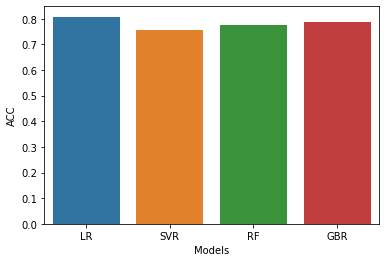

In [53]:
# تصوير نسبة نجاح النموذج 
sns.barplot(final_data_r['Models'],final_data_r['ACC'])

In [54]:
# هنا نحول المسألة المطروحة من مشكلة إنحدار الى تصنيف 
y_train = [1 if val > 0.8 else 0 for val in y_train ]
y_test = [1 if val > 0.8 else 0 for val in y_test ]

In [55]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [56]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)
a1 = accuracy_score(y_test,y_pred1)
a1

0.95

In [57]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
a2 = accuracy_score(y_test,y_pred2)
a2

0.925

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3= knn.predict(X_test)
a3 = accuracy_score(y_test,y_pred3)
a3

0.925

In [59]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)
a4 = accuracy_score(y_test,y_pred4)
a4

0.925

In [60]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred5 = gbc.predict(X_test)
a5 = accuracy_score(y_test,y_pred5)
a5

0.925

In [61]:
final_data_c = pd.DataFrame({'Models':['LOG','SVC','KNN','RF','GBC'],
                            'ACC':[a1,a2,a3,a4,a5]})

final_data_c

,Models,ACC
0,LOG,0.950
1,SVC,0.925
2,KNN,0.925
3,RF,0.925
4,GBC,0.925


<AxesSubplot:xlabel='Models', ylabel='ACC'>

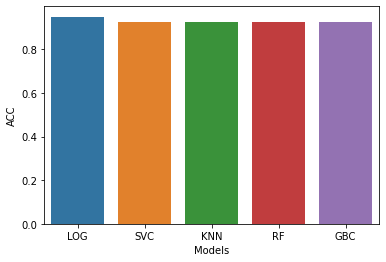

In [62]:
sns.barplot(final_data_c['Models'],final_data_c['ACC'])

In [63]:
X = data.drop('Chance of Admit ',axis = 1)
y = data['Chance of Admit ']
y = [1 if val > 0.8 else 0 for val in y]
y = np.array(y)
X = sc.fit_transform(X)
#   لأنه قيمه متقطعة 1و0  yطبعا لن نقوم بتهجيم     
gr = GradientBoostingClassifier()
gr.fit(X,y)

GradientBoostingClassifier()

In [64]:
# حفظ النموذج 
oblib.dump(gr,'admission_model')
model = joblib.load('admission_model')

In [65]:
# وجب تحجيم القيم قبل إدخالها الى النوذج 
sc.transform([[320,118,3,3.5,4,8,1]])

array([[ 0.2785948 ,  1.74697064, -0.07660001,  0.0994422 ,  0.61012728,
        -1.00563118,  0.90911166]])

In [66]:
# التنبوء بإستخدام النموذج المحفوظ 
model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

array([1])

In [67]:
# بناء واجه رسومية للنموذج 

def show():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
   
    model =joblib.load('admission_model')
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7]]))
    
    if result == 1:
        Label(master, text = 'High Chance of getting admission').grid(row=8)
    else:
        Label(master, text = 'You may get admission').grid(row=8)

    

master = Tk()
master.title('Graduate Admission Prediction')
label = Label(master,text = 'Graduate Admission Prediction',bg = 'black',fg='white').grid(row=0,columnspan= 2)
Label(master,text='GRE Score').grid(row =1 )
Label(master,text='TOEFL Score').grid(row =2 )
Label(master,text='University Rating').grid(row =3)
Label(master,text='SOP').grid(row =4 )
Label(master,text='LOR').grid(row =5 )
Label(master,text='CGPA').grid(row =6 )
Label(master,text='Research').grid(row =7 )



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)




Button(master,text='Predict',command=show).grid()

mainloop()